In [2]:
import pandas as pd

In [3]:
from wordcloud import WordCloud

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import *
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron

In [86]:
file_path = "C:\\Users\\agrim\\Python_Projects\\SMSSpamCollection.txt"

df = pd.read_table(file_path, sep = '\t', header = None)

In [87]:
df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)
df.head()

,0,1
0,ham,Was gr8 to see that message. So when r u leavi...
1,ham,Anything lor... U decide...
2,ham,"I'm back &amp; we're packing the car now, I'll..."
3,spam,"This is the 2nd attempt to contract U, you hav..."
4,ham,Shall call now dear having food


In [88]:
df.rename(columns={0: 'label', 1:'sms_message'}, inplace=True)
df.head()

,label,sms_message
0,ham,Was gr8 to see that message. So when r u leavi...
1,ham,Anything lor... U decide...
2,ham,"I'm back &amp; we're packing the car now, I'll..."
3,spam,"This is the 2nd attempt to contract U, you hav..."
4,ham,Shall call now dear having food


In [89]:
df['label'] = df['label'].replace('ham',0)
df['label'] = df['label'].replace('spam',1)
df.head()

,label,sms_message
0,0,Was gr8 to see that message. So when r u leavi...
1,0,Anything lor... U decide...
2,0,"I'm back &amp; we're packing the car now, I'll..."
3,1,"This is the 2nd attempt to contract U, you hav..."
4,0,Shall call now dear having food


In [90]:
X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df['sms_message'], df['label'], random_state =42)

X_train_sms.head()

4281    o turns out i had stereo love on mi phone unde...
585     Hey sweet, I was wondering when you had a mome...
4545                            Yes see ya not on the dot
3034    PRIVATE! Your 2004 Account Statement for 07742...
2758    FREE RINGTONE text FIRST to 87131 for a poly o...
Name: sms_message, dtype: object

In [91]:
count_vector = CountVectorizer(ngram_range = (1,1), lowercase = True, stop_words = 'english')

In [92]:
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()

In [93]:
X_train_feature_list = count_vector.get_feature_names_out()
print(X_train_feature_list)

['00' '000' '000pes' ... 'èn' 'ú1' '〨ud']


In [94]:
frequencey_matrix_X_train = pd.DataFrame(X_train, columns = X_train_feature_list)
frequencey_matrix_X_train.head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zeros,zhong,zindgi,zoe,zoom,zouk,zyada,èn,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
MNB = MultinomialNB()
MNB.fit(X_train,Y_train)

MultinomialNB()

In [96]:
predictions = MNB.predict(X_test)

In [97]:
accuracy_score(predictions,Y_test)

0.9870782483847811

In [98]:
precision_score(predictions, Y_test)

0.9468085106382979

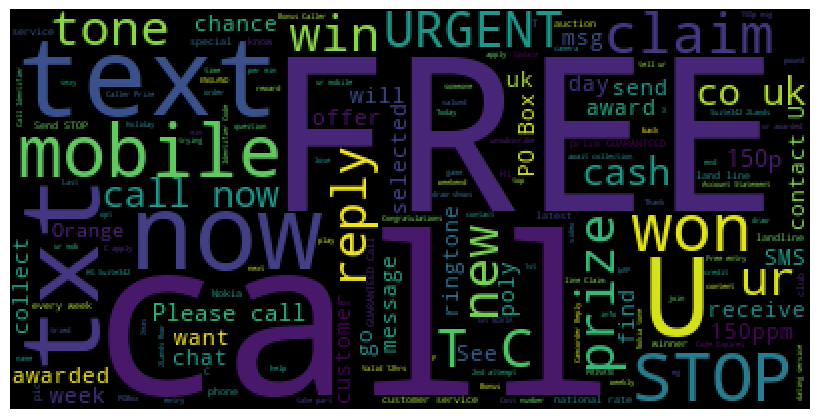

In [99]:
spam_words = ' '.join(X_train_sms[Y_train == 1])
wordcloud = WordCloud( max_words=150).generate(spam_words)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

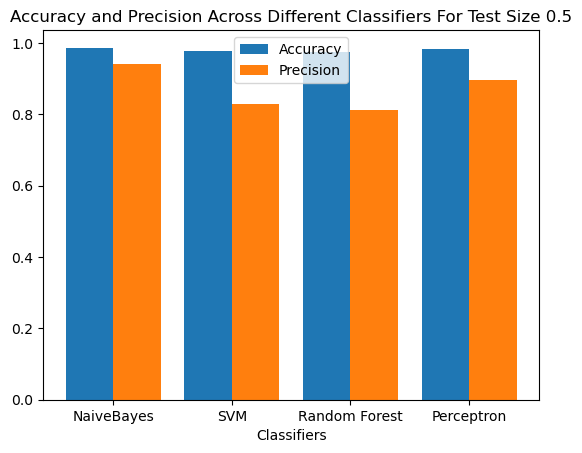

In [100]:


SVM = SVC(kernel = 'rbf')
RF = RandomForestClassifier()
P = Perceptron(random_state = 42)


X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df['sms_message'], df['label'], test_size = 0.5, random_state =42)
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()
MNB.fit(X_train,Y_train)
SVM.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
P.fit(X_train,Y_train)


NB_accuracy = accuracy_score(MNB.predict(X_test), Y_test)
NB_precision = precision_score(MNB.predict(X_test), Y_test)
SVM_accuracy= accuracy_score(SVM.predict(X_test), Y_test)
SVM_precision = precision_score(SVM.predict(X_test), Y_test)
Random_Forest_accuracy =accuracy_score(RF.predict(X_test), Y_test)
Random_Forest_precision = precision_score(RF.predict(X_test), Y_test)
P_accuracy =accuracy_score(P.predict(X_test), Y_test)
P_precision = precision_score(P.predict(X_test), Y_test)


X = ['NaiveBayes', 'SVM', 'Random Forest', 'Perceptron']
Yaccuracy = [NB_accuracy, SVM_accuracy, Random_Forest_accuracy, P_accuracy]
Zprecision = [NB_precision, SVM_precision, Random_Forest_precision, P_precision]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yaccuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, Zprecision, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")

plt.title("Accuracy and Precision Across Different Classifiers For Test Size 0.5")
plt.legend()
plt.show()


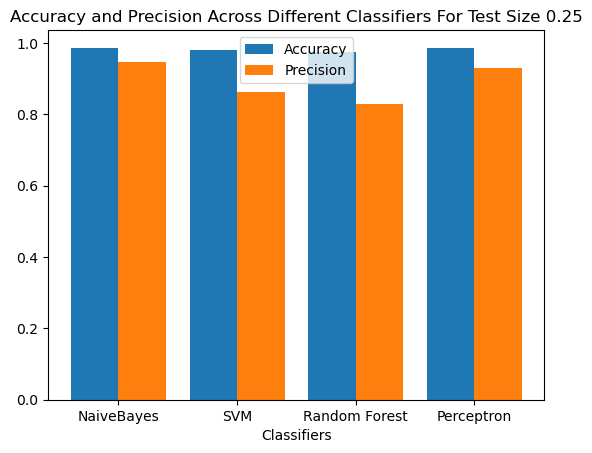

In [101]:
X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df['sms_message'], df['label'], test_size = 0.25, random_state =42)
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()
MNB.fit(X_train,Y_train)
SVM.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
P.fit(X_train,Y_train)


NB_accuracy = accuracy_score(MNB.predict(X_test), Y_test)
NB_precision = precision_score(MNB.predict(X_test), Y_test)
SVM_accuracy= accuracy_score(SVM.predict(X_test), Y_test)
SVM_precision = precision_score(SVM.predict(X_test), Y_test)
Random_Forest_accuracy =accuracy_score(RF.predict(X_test), Y_test)
Random_Forest_precision = precision_score(RF.predict(X_test), Y_test)
P_accuracy =accuracy_score(P.predict(X_test), Y_test)
P_precision = precision_score(P.predict(X_test), Y_test)


X = ['NaiveBayes', 'SVM', 'Random Forest', 'Perceptron']
Yaccuracy = [NB_accuracy, SVM_accuracy, Random_Forest_accuracy, P_accuracy]
Zprecision = [NB_precision, SVM_precision, Random_Forest_precision, P_precision]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yaccuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, Zprecision, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")

plt.title("Accuracy and Precision Across Different Classifiers For Test Size 0.25")
plt.legend()
plt.show()

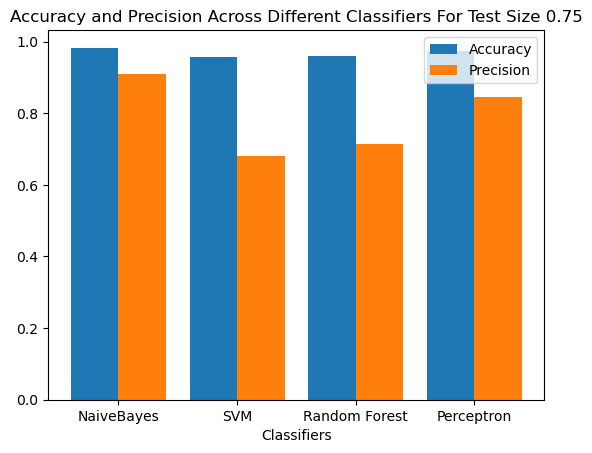

In [102]:
X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df['sms_message'], df['label'], test_size = 0.75, random_state =42)
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()
MNB.fit(X_train,Y_train)
SVM.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
P.fit(X_train,Y_train)


NB_accuracy = accuracy_score(MNB.predict(X_test), Y_test)
NB_precision = precision_score(MNB.predict(X_test), Y_test)
SVM_accuracy= accuracy_score(SVM.predict(X_test), Y_test)
SVM_precision = precision_score(SVM.predict(X_test), Y_test)
Random_Forest_accuracy =accuracy_score(RF.predict(X_test), Y_test)
Random_Forest_precision = precision_score(RF.predict(X_test), Y_test)
P_accuracy =accuracy_score(P.predict(X_test), Y_test)
P_precision = precision_score(P.predict(X_test), Y_test)


X = ['NaiveBayes', 'SVM', 'Random Forest', 'Perceptron']
Yaccuracy = [NB_accuracy, SVM_accuracy, Random_Forest_accuracy, P_accuracy]
Zprecision = [NB_precision, SVM_precision, Random_Forest_precision, P_precision]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yaccuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, Zprecision, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")

plt.title("Accuracy and Precision Across Different Classifiers For Test Size 0.75")
plt.legend()
plt.show()

In [103]:
X = count_vector.fit_transform(df['sms_message'])
Y = df['label']


In [104]:
kf = KFold(n_splits = 5)

In [105]:
accuracy_list = []
precision_list = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}")

    
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    MNB.fit(X_train,Y_train)
    KFPredict = MNB.predict(X_test)
    
    accuracy = accuracy_score(KFPredict,Y_test)
    precision = precision_score(KFPredict,Y_test)
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    
    print(f" Accuracy: {accuracy}")
    print(f" Precision: {precision}")
    print("\n")
    

mean_accuracy = mean(accuracy_list)
mean_precision = mean(precision_list)
print(f" Mean Accuracy: {mean_accuracy}")
print(f" Mean Precision: {mean_precision}")

Fold 0
 Accuracy: 0.979372197309417
 Precision: 0.9548387096774194


Fold 1
 Accuracy: 0.9865470852017937
 Precision: 0.9811320754716981


Fold 2
 Accuracy: 0.9802513464991023
 Precision: 0.9294871794871795


Fold 3
 Accuracy: 0.9748653500897666
 Precision: 0.9577464788732394


Fold 4
 Accuracy: 0.9838420107719928
 Precision: 0.9555555555555556


 Mean Accuracy: 0.9809755979744145
 Mean Precision: 0.9557519998130184


In [106]:
kf = KFold(n_splits = 10)


accuracy_list = []
precision_list = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}")
 
    
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    MNB.fit(X_train,Y_train)
    KFPredict = MNB.predict(X_test)
    
    accuracy = accuracy_score(KFPredict,Y_test)
    precision = precision_score(KFPredict,Y_test)
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    
    print(f" Accuracy: {accuracy}")
    print(f" Precision: {precision}")
    print("\n")
  

mean_accuracy = mean(accuracy_list)
mean_precision = mean(precision_list)
print(f" Mean Accuracy: {mean_accuracy}")
print(f" Mean Precision: {mean_precision}")

Fold 0
 Accuracy: 0.978494623655914
 Precision: 0.948051948051948


Fold 1
 Accuracy: 0.978494623655914
 Precision: 0.9615384615384616


Fold 2
 Accuracy: 0.9910233393177738
 Precision: 0.9882352941176471


Fold 3
 Accuracy: 0.9856373429084381
 Precision: 0.972972972972973


Fold 4
 Accuracy: 0.9856373429084381
 Precision: 0.96


Fold 5
 Accuracy: 0.9784560143626571
 Precision: 0.9012345679012346


Fold 6
 Accuracy: 0.9802513464991023
 Precision: 0.9764705882352941


Fold 7
 Accuracy: 0.9712746858168761
 Precision: 0.9298245614035088


Fold 8
 Accuracy: 0.9766606822262118
 Precision: 0.927536231884058


Fold 9
 Accuracy: 0.992818671454219
 Precision: 0.9848484848484849


 Mean Accuracy: 0.9818748672805544
 Mean Precision: 0.955071311095361


In [107]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)


accuracy_list = []
precision_list = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}")
   
    
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    MNB.fit(X_train,Y_train)
    KFPredict = MNB.predict(X_test)
    
    accuracy = accuracy_score(KFPredict,Y_test)
    precision = precision_score(KFPredict,Y_test)
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    
    print(f" Accuracy: {accuracy}")
    print(f" Precision: {precision}")
    print("\n")
   

mean_accuracy = mean(accuracy_list)
mean_precision = mean(precision_list)
print(f" Mean Accuracy: {mean_accuracy}")
print(f" Mean Precision: {mean_precision}")

Fold 0
 Accuracy: 0.9757847533632287
 Precision: 0.9493670886075949


Fold 1
 Accuracy: 0.9829596412556054
 Precision: 0.974025974025974


Fold 2
 Accuracy: 0.9757630161579892
 Precision: 0.9285714285714286


Fold 3
 Accuracy: 0.9766606822262118
 Precision: 0.9455782312925171


Fold 4
 Accuracy: 0.9820466786355476
 Precision: 0.9391891891891891


 Mean Accuracy: 0.9786429543277165
 Mean Precision: 0.9473463823373407


In [108]:
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)


accuracy_list = []
precision_list = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}")
   
    
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    MNB.fit(X_train,Y_train)
    KFPredict = MNB.predict(X_test)
    
    accuracy = accuracy_score(KFPredict,Y_test)
    precision = precision_score(KFPredict,Y_test)
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    
    print(f" Accuracy: {accuracy}")
    print(f" Precision: {precision}")
    print("\n")
 

mean_accuracy = mean(accuracy_list)
mean_precision = mean(precision_list)
print(f" Mean Accuracy: {mean_accuracy}")
print(f" Mean Precision: {mean_precision}")

Fold 0
 Accuracy: 0.9767025089605734
 Precision: 0.925


Fold 1
 Accuracy: 0.9802867383512545
 Precision: 0.9871794871794872


Fold 2
 Accuracy: 0.9748653500897666
 Precision: 0.9466666666666667


Fold 3
 Accuracy: 0.9892280071813285
 Precision: 1.0


Fold 4
 Accuracy: 0.9802513464991023
 Precision: 0.9354838709677419


Fold 5
 Accuracy: 0.9730700179533214
 Precision: 0.9358974358974359


Fold 6
 Accuracy: 0.9748653500897666
 Precision: 0.9166666666666666


Fold 7
 Accuracy: 0.9748653500897666
 Precision: 0.9733333333333334


Fold 8
 Accuracy: 0.9856373429084381
 Precision: 0.9605263157894737


Fold 9
 Accuracy: 0.9784560143626571
 Precision: 0.9166666666666666


 Mean Accuracy: 0.9788228026485974
 Mean Precision: 0.9497420443167472


In [5]:
imbalanced_file_path = "C:\\Users\agrim\\Python_Projects\AI_Learning-Research\imbalanced_spam.csv"
df3 = pd.read_csv(imbalanced_file_path)

df3 = df3.reindex(np.random.permutation(df3.index))
df3.reset_index(inplace=True, drop=True)
df3.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\agrim\\Python_Projects\\Imbalanced Spam Dataset - Sheet1 (1).csv'

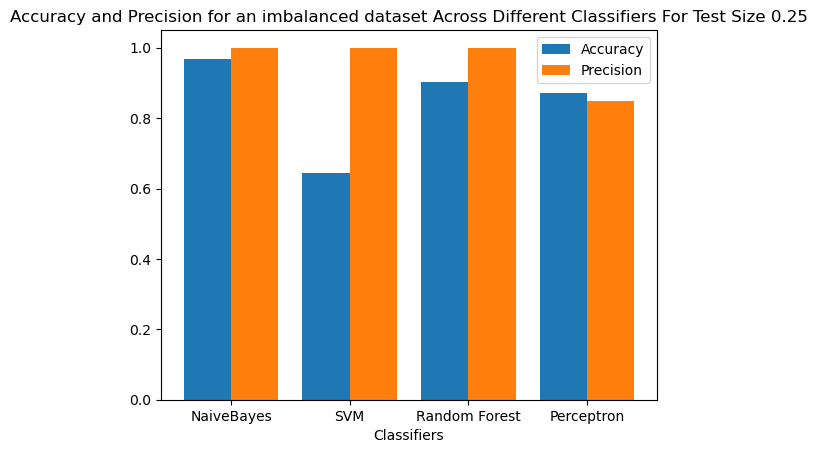

In [117]:
X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df3['email'], df3['label'], test_size = 0.25, random_state =42)
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()
MNB.fit(X_train,Y_train)
SVM.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
P.fit(X_train,Y_train)


NB_accuracy = accuracy_score(MNB.predict(X_test), Y_test)
NB_precision = precision_score(MNB.predict(X_test), Y_test)
SVM_accuracy= accuracy_score(SVM.predict(X_test), Y_test)
SVM_precision = precision_score(SVM.predict(X_test), Y_test)
Random_Forest_accuracy =accuracy_score(RF.predict(X_test), Y_test)
Random_Forest_precision = precision_score(RF.predict(X_test), Y_test)
P_accuracy =accuracy_score(P.predict(X_test), Y_test)
P_precision = precision_score(P.predict(X_test), Y_test)


X = ['NaiveBayes', 'SVM', 'Random Forest', 'Perceptron']
Yaccuracy = [NB_accuracy, SVM_accuracy, Random_Forest_accuracy, P_accuracy]
Zprecision = [NB_precision, SVM_precision, Random_Forest_precision, P_precision]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yaccuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, Zprecision, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")

plt.title("Accuracy and Precision for an imbalanced dataset Across Different Classifiers For Test Size 0.25")
plt.legend()
plt.show()

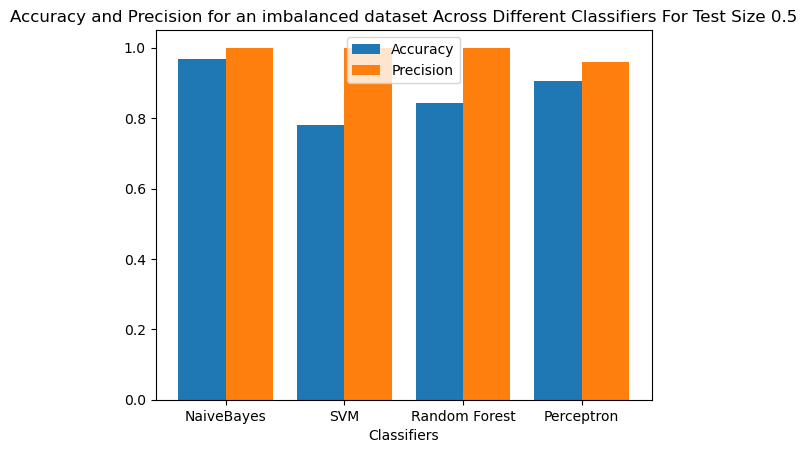

In [113]:
X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df3['email'], df3['label'], test_size = 0.5, random_state =42)
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()
MNB.fit(X_train,Y_train)
SVM.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
P.fit(X_train,Y_train)


NB_accuracy = accuracy_score(MNB.predict(X_test), Y_test)
NB_precision = precision_score(MNB.predict(X_test), Y_test)
SVM_accuracy= accuracy_score(SVM.predict(X_test), Y_test)
SVM_precision = precision_score(SVM.predict(X_test), Y_test)
Random_Forest_accuracy =accuracy_score(RF.predict(X_test), Y_test)
Random_Forest_precision = precision_score(RF.predict(X_test), Y_test)
P_accuracy =accuracy_score(P.predict(X_test), Y_test)
P_precision = precision_score(P.predict(X_test), Y_test)


X = ['NaiveBayes', 'SVM', 'Random Forest', 'Perceptron']
Yaccuracy = [NB_accuracy, SVM_accuracy, Random_Forest_accuracy, P_accuracy]
Zprecision = [NB_precision, SVM_precision, Random_Forest_precision, P_precision]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yaccuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, Zprecision, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")

plt.title("Accuracy and Precision for an imbalanced dataset Across Different Classifiers For Test Size 0.5")
plt.legend()
plt.show()

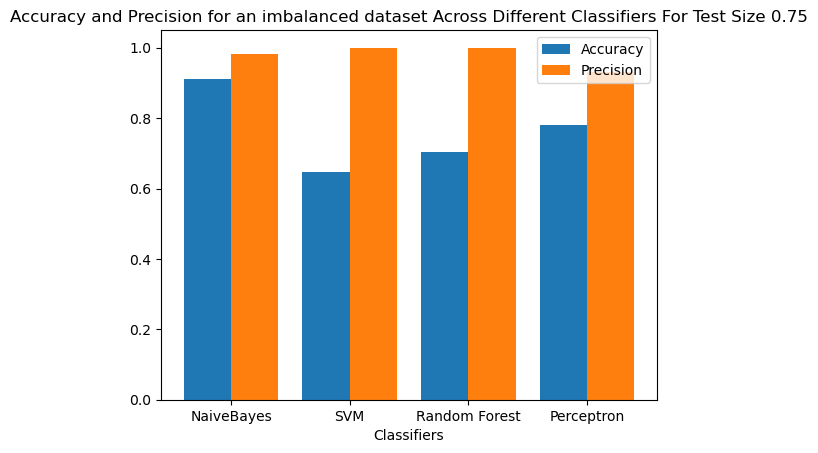

In [118]:
X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df3['email'], df3['label'], test_size = 0.75, random_state =42)
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()
MNB.fit(X_train,Y_train)
SVM.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
P.fit(X_train,Y_train)


NB_accuracy = accuracy_score(MNB.predict(X_test), Y_test)
NB_precision = precision_score(MNB.predict(X_test), Y_test)
SVM_accuracy= accuracy_score(SVM.predict(X_test), Y_test)
SVM_precision = precision_score(SVM.predict(X_test), Y_test)
Random_Forest_accuracy =accuracy_score(RF.predict(X_test), Y_test)
Random_Forest_precision = precision_score(RF.predict(X_test), Y_test)
P_accuracy =accuracy_score(P.predict(X_test), Y_test)
P_precision = precision_score(P.predict(X_test), Y_test)


X = ['NaiveBayes', 'SVM', 'Random Forest', 'Perceptron']
Yaccuracy = [NB_accuracy, SVM_accuracy, Random_Forest_accuracy, P_accuracy]
Zprecision = [NB_precision, SVM_precision, Random_Forest_precision, P_precision]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yaccuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, Zprecision, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")

plt.title("Accuracy and Precision for an imbalanced dataset Across Different Classifiers For Test Size 0.75")
plt.legend()
plt.show()